In [1]:
from tensorflow.keras.layers import Dense, Flatten , Dropout , BatchNormalization
from tensorflow.keras.models import Model
from keras.applications.densenet import DenseNet201
#from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications.vgg19 import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

C:\Users\kesha\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kesha\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\kesha\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\kesha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE = [128, 128]

In [3]:
# add preprocessing layer to the front of VGG
r = DenseNet201(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in r.layers:
  layer.trainable = False

In [5]:
# our layers - you can add more if you want
x = Flatten()(r.output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
prediction = Dense(4, activation='softmax')(x)

In [6]:
# create a model object
model = Model(inputs=r.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']      

In [7]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Training',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Testing',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 3038 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [13]:
from tensorflow import keras
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [14]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[early_stop]
)

Epoch 1/10
95/95 [==============================] - 148s 2s/step - loss: 0.1684 - accuracy: 0.9421 - val_loss: 0.2643 - val_accuracy: 0.9036
Epoch 2/10
95/95 [==============================] - 145s 2s/step - loss: 0.1324 - accuracy: 0.9546 - val_loss: 0.2052 - val_accuracy: 0.9492
Epoch 3/10
95/95 [==============================] - 145s 2s/step - loss: 0.1281 - accuracy: 0.9585 - val_loss: 0.2684 - val_accuracy: 0.9213
Epoch 4/10
95/95 [==============================] - 140s 1s/step - loss: 0.1273 - accuracy: 0.9562 - val_loss: 0.3152 - val_accuracy: 0.9416
Epoch 5/10
95/95 [==============================] - 140s 1s/step - loss: 0.1333 - accuracy: 0.9533 - val_loss: 0.4079 - val_accuracy: 0.9137
Epoch 6/10
95/95 [==============================] - 141s 1s/step - loss: 0.1164 - accuracy: 0.9608 - val_loss: 0.1880 - val_accuracy: 0.9416
Epoch 7/10
95/95 [==============================] - 140s 1s/step - loss: 0.0950 - accuracy: 0.9694 - val_loss: 0.1167 - val_accuracy: 0.9695
Epoch 8/10
95

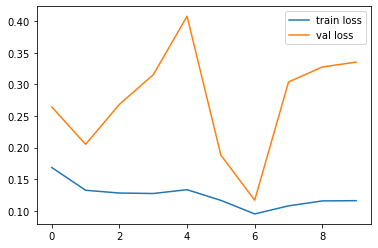

<Figure size 432x288 with 0 Axes>

In [15]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

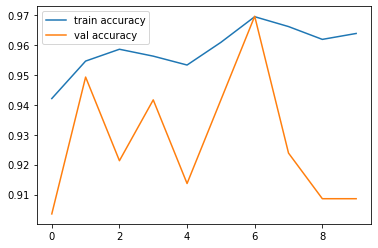

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')